In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [2]:
applicant_details = pd.read_csv('train_values.csv')
label_data = pd.read_csv('train_labels.csv')
test_data = pd.read_csv('test_values.csv')
applicant_details = applicant_details.merge(label_data, on="row_id")
applicant_details.head(20)

row_id  loan_type  property_type  loan_purpose  occupancy  loan_amount  \
0        0          2              1             1          1        139.0   
1        1          2              2             1          1        160.0   
2        2          1              2             1          1        168.0   
3        3          1              2             1          1         57.0   
4        4          2              1             2          1         25.0   
5        5          2              1             1          1         88.0   
6        6          2              1             1          1        345.0   
7        7          2              1             1          1        123.0   
8        8          1              2             1          1         68.0   
9        9          1              2             1          1         27.0   
10      10          1              2             1          2         80.0   
11      11          1              1             1          1        385.0   
12      12          1              1             1          1         43.0   
13      13          2              1             1          1        163.0   
14      14          1              1             3          1        103.0   
15      15          1              1             2          1         50.0   
16      16          2              1             3          1        105.0   
17      17          1              1             1          1        137.0   
18      18          1              2             1          1         42.0   
19      19          1              1             1          1         78.0   

    preapproval  msa_md  state_code  county_code  ...  applicant_income  \
0             1     261          14          246  ...              77.0   
1             3     349          48          311  ...              42.0   
2             3     385          30          256  ...              34.0   
3             3     117          30           46  ...              37.0   
4             3      95          41          192  ...              46.0   
5             2     261          50           92  ...              53.0   
6             3      80           9          232  ...              90.0   
7             3     189           3          207  ...              38.0   
8             3     128          33          150  ...              35.0   
9             3     261          29          119  ...              39.0   
10            2     261          11           78  ...              49.0   
11            1     404          18           55  ...             204.0   
12            3     261          44          311  ...              57.0   
13            3      86           3          143  ...              32.0   
14            3     261          41          274  ...              35.0   
15            3     117          30           46  ...             118.0   
16            3     404          18           55  ...               NaN   
17            3      80           9           83  ...              61.0   
18            3     261          48          126  ...              26.0   
19            3      71          27          269  ...              34.0   

    population  minority_population_pct  ffiecmedian_family_income  \
0       5949.0                   11.642                    63192.0   
1       2667.0                   37.141                    63693.0   
2       6393.0                   79.635                    42883.0   
3       7175.0                   72.843                    63806.0   
4       5041.0                   23.188                    70908.0   
5       3278.0                    4.913                    55945.0   
6       3827.0                   16.331                   114291.0   
7       5975.0                   47.466                    73584.0   
8       7294.0                   24.169                    57170.0   
9       6331.0                    4.057                    47600.0   
10      4031.0     

In [3]:
applicant_details.dtypes

row_id                              int64
loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                         bool
rate_spread                       float64
dtype: object

In [4]:
def explore_data(columns_selected):
    for col in columns_selected:
        print(applicant_details[col].value_counts())
        
columns_for_check = ['loan_type', 'property_type', 'loan_purpose', 'occupancy', 'loan_amount', 'preapproval', 'msa_md', 'state_code', 
                                                                'county_code', 'applicant_ethnicity', 'applicant_race', 'applicant_sex', 'applicant_income', 'population', 
                                                                'minority_population_pct', 'ffiecmedian_family_income', 'tract_to_msa_md_income_pct', 
                                                                'number_of_owner-occupied_units', 'number_of_1_to_4_family_units', 'lender']
explore_data(columns_for_check)

2    106308
1     90705
4      1905
3      1082
Name: loan_type, dtype: int64
1    169262
2     30500
3       238
Name: property_type, dtype: int64
1    146103
3     42624
2     11273
Name: loan_purpose, dtype: int64
1    188015
2     11693
3       292
Name: occupancy, dtype: int64
25.0      1426
51.0      1310
50.0      1202
74.0      1195
73.0      1184
76.0      1180
79.0      1168
82.0      1165
49.0      1157
59.0      1155
69.0      1140
80.0      1135
70.0      1133
60.0      1130
81.0      1130
83.0      1126
64.0      1126
61.0      1122
75.0      1119
78.0      1115
67.0      1107
55.0      1094
86.0      1089
65.0      1088
89.0      1081
71.0      1081
66.0      1072
85.0      1071
68.0      1070
63.0      1069
          ... 
948.0        1
910.0        1
1439.0       1
931.0        1
1676.0       1
3046.0       1
2756.0       1
780.0        1
966.0        1
1448.0       1
2361.0       1
1183.0       1
1022.0       1
787.0        1
855.0        1
1697.0       1
1196.0      

In [5]:
applicant_details.isna().sum()

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  10708
population                         1995
minority_population_pct            1995
ffiecmedian_family_income          1985
tract_to_msa_md_income_pct         2023
number_of_owner-occupied_units     2012
number_of_1_to_4_family_units      2016
lender                                0
co_applicant                          0
rate_spread                           0
dtype: int64

In [6]:
applicant_details.describe()

row_id      loan_type  property_type   loan_purpose  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean    99999.500000       1.570935       1.154880       1.482605   
std     57735.171256       0.559410       0.365066       0.822156   
min         0.000000       1.000000       1.000000       1.000000   
25%     49999.750000       1.000000       1.000000       1.000000   
50%     99999.500000       2.000000       1.000000       1.000000   
75%    149999.250000       2.000000       1.000000       2.000000   
max    199999.000000       4.000000       3.000000       3.000000   

           occupancy    loan_amount    preapproval         msa_md  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.061385     142.574940       2.702950     226.974970   
std         0.246043     142.559487       0.545658     106.655259   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000      67.000000       2.000000     154.000000   
50%         1.000000     116.000000       3.000000     261.000000   
75%         1.000000     179.000000       3.000000     318.000000   
max         3.000000   11104.000000       3.000000     408.000000   

          state_code    county_code  ...  applicant_sex  applicant_income  \
count  200000.000000  200000.000000  ...  200000.000000     189292.000000   
mean       28.202045     166.335230  ...       1.417540         73.617902   
std        15.593383      92.852518  ...       0.577133        105.696934   
min        -1.000000       0.000000  ...       1.000000          1.000000   
25%        14.000000      83.000000  ...       1.000000         39.000000   
50%        30.000000     181.000000  ...       1.000000         56.000000   
75%        41.000000     249.000000  ...       2.000000         83.000000   
max        52.000000     316.000000  ...       4.000000      10042.000000   

          population  minority_population_pct  ffiecmedian_family_income  \
count  198005.000000            198005.000000              198015.000000   
mean     5391.099099                34.238640               64595.355801   
std      2669.028807                27.930882               12724.514485   
min         7.000000                 0.326000               17860.000000   
25%      3717.000000                10.928000               56654.000000   
50%      4959.000000                25.996000               63485.000000   
75%      6470.000000                52.000000               71238.000000   
max     34126.000000               100.000000              125095.000000   

       tract_to_msa_md_income_pct  number_of_owner-occupied_units  \
count               197977.000000                   197988.000000   
mean                    89.283022                     1402.872401   
std                     15.059223                      706.880410   
min                      6.193000                        3.000000   
25%                     81.648000                      932.000000   
50%                     98.959000                     1304.000000   
75%                    100.000000                     1742.000000   
max                    100.000000                     8747.000000   

       number_of_1_to_4_family_units         lender    rate_spread  
count                  197984.000000  200000.000000  200000.000000  
mean                     1927.336618    2001.311505       1.979110  
std                       886.576586    1271.134197       1.656809  
min                         6.000000       0.000000       1.000000  
25%                      1344.000000     963.000000       1.000000  
50%                      1799.000000    1834.000000       1.000000  
75%                      2353.000000    3180.000000       2.000000  
max                     13615.000000    4283.000000      99.000000  

[8 rows x 22 columns]

In [7]:
data_prepared = applicant_details.fillna(applicant_details.median())
test_data_prepared = test_data.fillna(applicant_details.median())

In [8]:
test_data_prepared.describe()

row_id      loan_type  property_type   loan_purpose  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean    99999.500000       1.569510       1.155060       1.481305   
std     57735.171256       0.560963       0.365017       0.820990   
min         0.000000       1.000000       1.000000       1.000000   
25%     49999.750000       1.000000       1.000000       1.000000   
50%     99999.500000       2.000000       1.000000       1.000000   
75%    149999.250000       2.000000       1.000000       2.000000   
max    199999.000000       4.000000       3.000000       3.000000   

           occupancy    loan_amount    preapproval         msa_md  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.061130     142.952260       2.702795     226.872515   
std         0.246015     145.685382       0.545001     106.492733   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000      66.000000       2.000000     154.000000   
50%         1.000000     116.000000       3.000000     261.000000   
75%         1.000000     178.000000       3.000000     317.000000   
max         3.000000   11594.000000       3.000000     408.000000   

          state_code    county_code  ...  applicant_race  applicant_sex  \
count  200000.000000  200000.000000  ...   200000.000000  200000.000000   
mean       28.174960     166.501625  ...        4.761500       1.415725   
std        15.592002      92.711275  ...        0.885348       0.575143   
min        -1.000000       0.000000  ...        1.000000       1.000000   
25%        14.000000      83.000000  ...        5.000000       1.000000   
50%        30.000000     181.000000  ...        5.000000       1.000000   
75%        41.000000     249.000000  ...        5.000000       2.000000   
max        52.000000     316.000000  ...        7.000000       4.000000   

       applicant_income     population  minority_population_pct  \
count     200000.000000  200000.000000            200000.000000   
mean          73.113885    5384.836260                33.987735   
std          105.735357    2635.525697                27.768641   
min            1.000000       6.000000                 0.312000   
25%           40.000000    3738.000000                10.910000   
50%           56.000000    4959.000000                25.994000   
75%           81.000000    6444.000000                51.396000   
max         9941.000000   34168.000000               100.000000   

       ffiecmedian_family_income  tract_to_msa_md_income_pct  \
count              200000.000000               200000.000000   
mean                64600.612525                   89.348955   
std                 12682.516415                   15.052176   
min                 17883.000000                    6.320000   
25%                 56763.750000                   81.814000   
50%                 63485.000000                   98.959000   
75%                 71231.000000                  100.000000   
max                125247.000000                  100.000000   

       number_of_owner-occupied_units  number_of_1_to_4_family_units  \
count                   200000.000000                  200000.000000   
mean                      1403.402660                    1928.936800   
std                        701.956145                     879.967802   
min                          6.000000                       1.000000   
25%                        937.000000                    1351.000000   
50%                       1304.000000                    1799.000000   
75%                       1738.000000                    2349.000000   
max                       8758.000000                   13619.000000   

              lender  
count  200000.000000  
mean     2009.081340  
std      1271.022425  
min         0.000000  
25%       973.000000  
50%      1866.000000  
75%      3180.000000  
max      4283.000000  

[8 rows x 21 columns]

In [9]:
data_prepared.isna().sum()

row_id                            0
loan_type                         0
property_type                     0
loan_purpose                      0
occupancy                         0
loan_amount                       0
preapproval                       0
msa_md                            0
state_code                        0
county_code                       0
applicant_ethnicity               0
applicant_race                    0
applicant_sex                     0
applicant_income                  0
population                        0
minority_population_pct           0
ffiecmedian_family_income         0
tract_to_msa_md_income_pct        0
number_of_owner-occupied_units    0
number_of_1_to_4_family_units     0
lender                            0
co_applicant                      0
rate_spread                       0
dtype: int64

In [10]:
data_prepared['log_loan_amount'] = np.log(data_prepared['loan_amount'])
data_prepared['log_applicant_income'] = np.log(data_prepared['applicant_income'])
data_prepared['log_tract_to_msa_md_income_pct'] = np.log(data_prepared['tract_to_msa_md_income_pct'])
data_prepared['log_rate_spread'] = np.log(data_prepared['rate_spread'])
data_prepared.loc[data_prepared['rate_spread'] > 9, 'rate_spread'] = data_prepared['rate_spread'].mean()

In [11]:
data_prepared.to_csv("data_prepared_3.csv")
test_data_prepared.to_csv("test_data_prepared.csv")

In [12]:
print(data_prepared['lender'].value_counts())

1119    9235
1268    5445
659     5217
3180    3174
2816    2973
205     2558
3864    2376
8       2353
3243    2287
1705    2100
2657    2064
4070    1991
356     1792
3300    1750
3681    1710
984     1663
105     1561
33      1535
2125    1531
1409    1530
516     1464
476     1441
170     1248
1066    1247
902     1223
2390    1222
1466    1216
1179    1214
2610    1067
2885    1057
        ... 
3689       1
2512       1
465        1
4178       1
759        1
2461       1
1102       1
461        1
671        1
415        1
717        1
2892       1
2206       1
3148       1
1357       1
3487       1
798        1
2166       1
540        1
3791       1
4047       1
2204       1
2076       1
1692       1
1487       1
3662       1
3229       1
2678       1
2129       1
1053       1
Name: lender, Length: 3893, dtype: int64


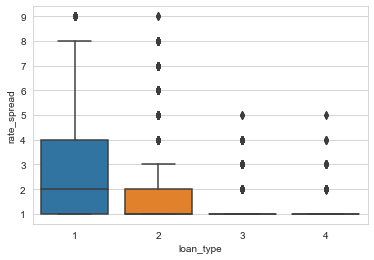

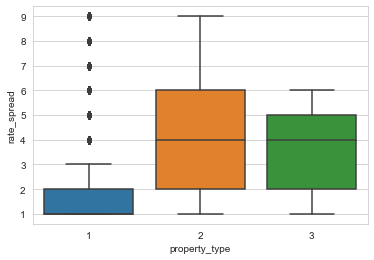

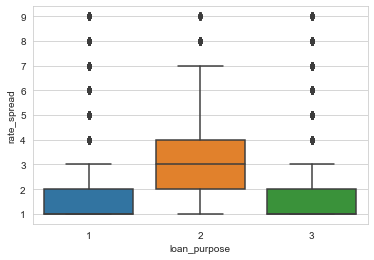

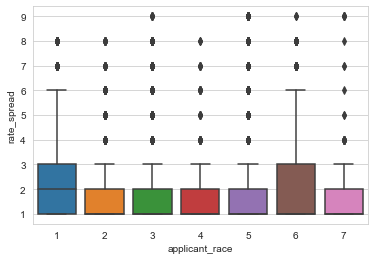

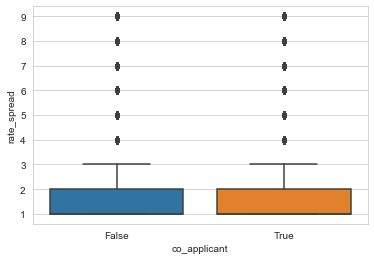

In [13]:
def plot_box(auto_prices, cols, col_y = 'rate_spread'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=auto_prices)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
cat_cols = ['loan_type', 'property_type', 'loan_purpose', 'occupancy', 'preapproval', 'applicant_ethnicity', 'applicant_race', 'applicant_sex', 'co_applicant']
plot_box(data_prepared.loc[data_prepared['rate_spread'] <= 10], cat_cols)

In [14]:
print(data_prepared['rate_spread'].value_counts())

1.00000    115091
2.00000     43464
3.00000     13663
4.00000      8292
6.00000      7854
5.00000      6353
8.00000      2611
7.00000      2455
1.97911       140
9.00000        77
Name: rate_spread, dtype: int64
